In [2]:
import argparse
import copy
import os
import os.path as osp
import time
import warnings
import cv2
import matplotlib.pyplot as plt
import numpy as np

import mmcv
import torch
import torch.distributed as dist
from mmcv.cnn.utils import revert_sync_batchnorm
from mmcv.runner import get_dist_info, init_dist
from mmcv.utils import Config, DictAction, get_git_hash

from mmseg import __version__
from mmseg.apis import init_random_seed, set_random_seed, train_segmentor
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.utils import collect_env, get_root_logger, setup_multi_processes

/opt/conda/envs/mmseg/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2022-05-05 06:10:05,862 - mmseg - INFO - Loaded 2760 images


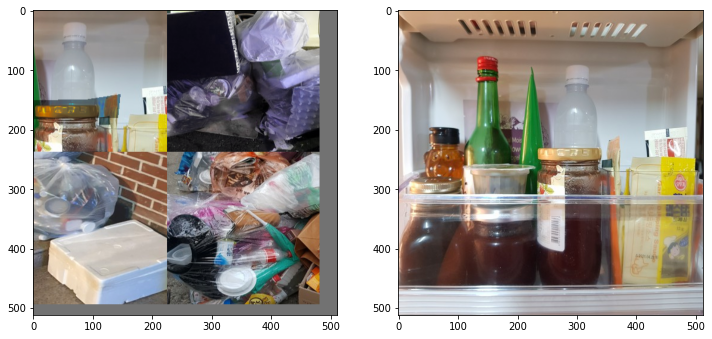

In [49]:
# Build the dataset

config = "../configs_my/myconfig/26_deeplabv3_cosanealing_mosaic2_multiscale.py"
cfg = Config.fromfile(config)

datasets = [build_dataset(cfg.data.train)]

sample = datasets[0][0]

img = sample['img'].data.cpu().numpy()
img = np.einsum("chw -> hwc", img)

img = img * sample['img_metas'].data['img_norm_cfg']['std'] + sample['img_metas'].data['img_norm_cfg']['mean']
img = img.astype(np.uint8)

img_orig = cv2.imread(sample['img_metas'].data['filename'])[...,::-1]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img)
ax[1].imshow(img_orig)


plt.show()